In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import csv

In [2]:
def get_log(root):
    log_path = os.path.join(root,'log', 'log.csv')
    log = {}
    with open(log_path, 'r') as f:
        f_csv = csv.DictReader(f)
        for row in f_csv:
            for key, value in row.items():
                log[key] = log.get(key,[]) + [eval(value)]
                
    for key in log.keys():
        log[key] = np.array(log[key])
        
    #log['step'] = (log['e']-1) * log['niter'] + log['iter']
    
    return log

In [3]:
def smooth(array, ratio=0.6):
    res = array.copy()
    l = len(res)
    for i in range(l):
        start, end = max(0, i-int(l*ratio*0.5)), min(l, i+int(l*ratio*0.5))
        res[i] = array[start:end].mean()
    return res
        

In [4]:
def display_group(log, group='loss'):
    plt.figure(figsize=(20,10))
    legend = []
    for key in log.keys():
        if not key.startswith(group):
            continue
        plt.plot(log['step'], smooth(log[key], 0.2))
        legend.append(key)
    plt.legend(legend)

In [5]:
def display_img(root, mode='latest'):
    imgs = list(filter(lambda x:x.endswith('png'), os.listdir(os.path.join(root, 'log'))))
    imgs_idx = [t.split('.')[0].split('_')[2:4] for t in imgs]
    imgs_idx = list(map(lambda t:list(map(lambda x:eval(x),t)), imgs_idx))
    imgs_idx = [(*imgs_idx[i], i) for i in range(len(imgs_idx))]
    imgs_idx.sort()
    
    if mode == 'latest':
        idx = imgs_idx[-1][-1]
        return Image.open(os.path.join(root, 'log', imgs[idx]))

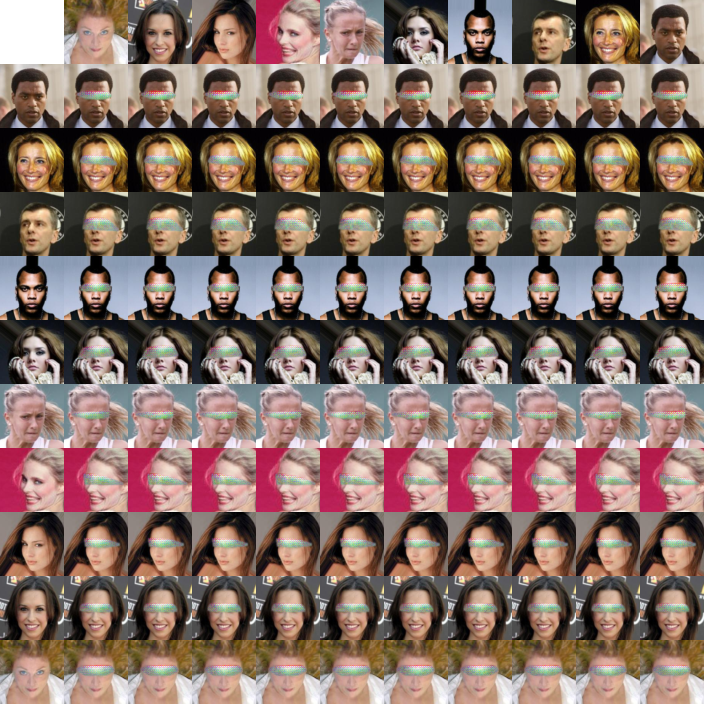

In [6]:
root = 'expr'
display_img(root)

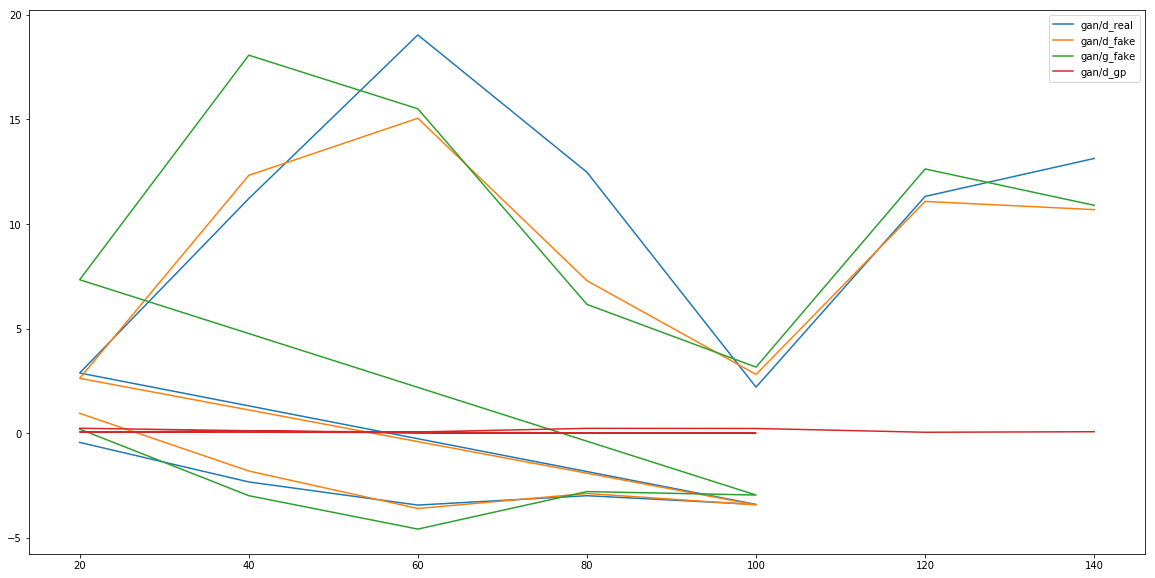

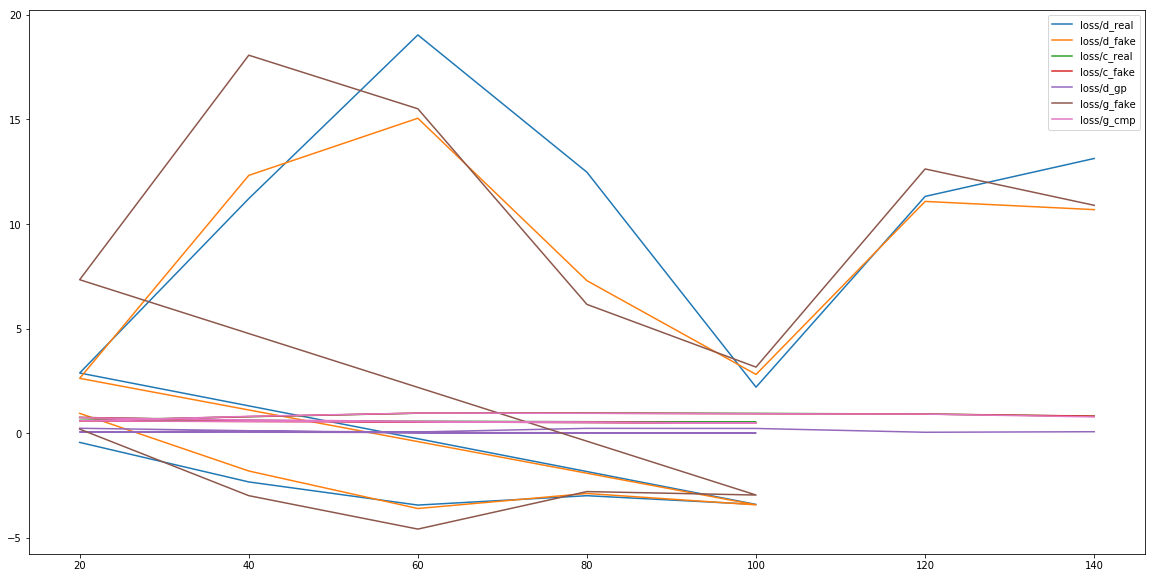

In [8]:
log = get_log('expr')
display_group(log, 'gan')
display_group(log, 'loss')